# Handcrafting a text-based game with TextWorld
This tutorial shows how to make a custom text-based game using the TextWorld's API.

## `GameMaker`
Let's make a game consisting of two rooms and where the goal is to place an object from the player's inventory inside a container located in the other room.

In [1]:
import textworld
from textworld import GameMaker

# Make the generation process reproducible.
from textworld import g_rng  # Global random generator.
g_rng.set_seed(20180916)

# GameMaker object for handcrafting text-based games.
M = GameMaker()

Documentation about the `GameMaker` API can be found at

https://textworld-docs.azurewebsites.net/textworld.generator.html#textworld.generator.maker.GameMaker

#### First, define the layout of the world.

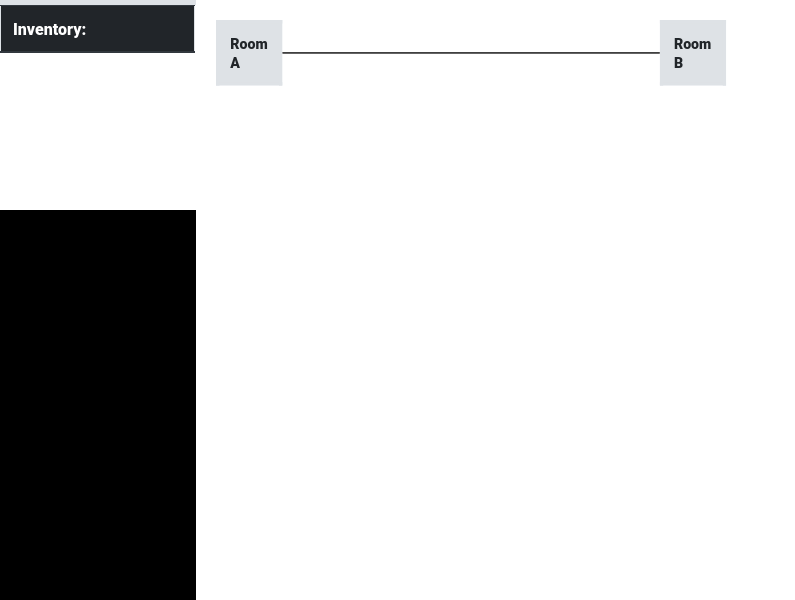

In [2]:
roomA = M.new_room("Room A")
roomB = M.new_room("Room B")
corridor = M.connect(roomA.east, roomB.west)
M.render()

#### Place the player somewhere.

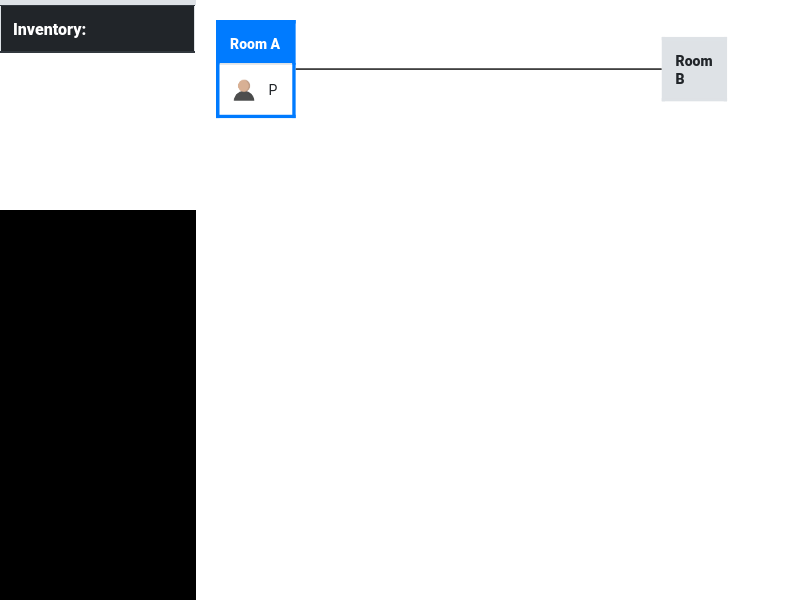

In [3]:
M.set_player(roomA)
M.render()

#### Add two objects to Room A.

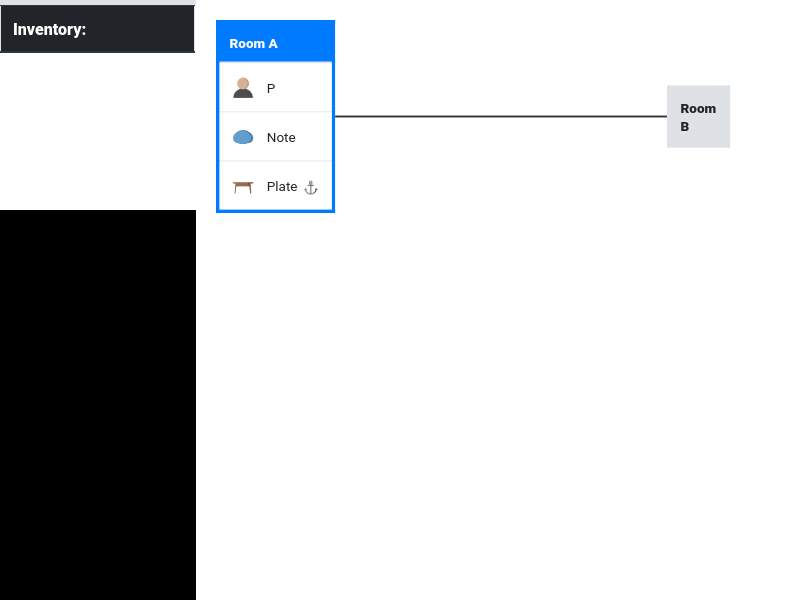

In [4]:
note = M.new(type='o', name="note")  # Provide the type and the name of the object.
note.infos.desc = "Bravo! You can read."  # Text to display when issuing command "examine note". 
supporter = M.new(type='s')  # When not provided, names are automatically generated.
roomA.add(supporter)  # Supporters are fixed in place.
roomA.add(note)  # When added directly to a room, portable objects are put on the floor.
M.render()

##### Supported types of objects

type | name | description
--------|-----|------------
'r' | room | can contain objects, can be connected with other rooms
'd' | door | (un)lockable, openable/closable
'c' | container | can hold objects, (un)lockable, openable/closable
's' | supporter | can hold objects
'o' | portable object | can be carried by the player
'k' | key | subtype of portable object, match a door or container's lock
'f' | food | subtype of portable object, can be eaten if edible
'oven' | oven | subtype of container, provide a heat source to cook food item
'stove' | stove | subtype of supporter, provide a heat source to cook food item

#### Let's add a locked door between the two rooms.

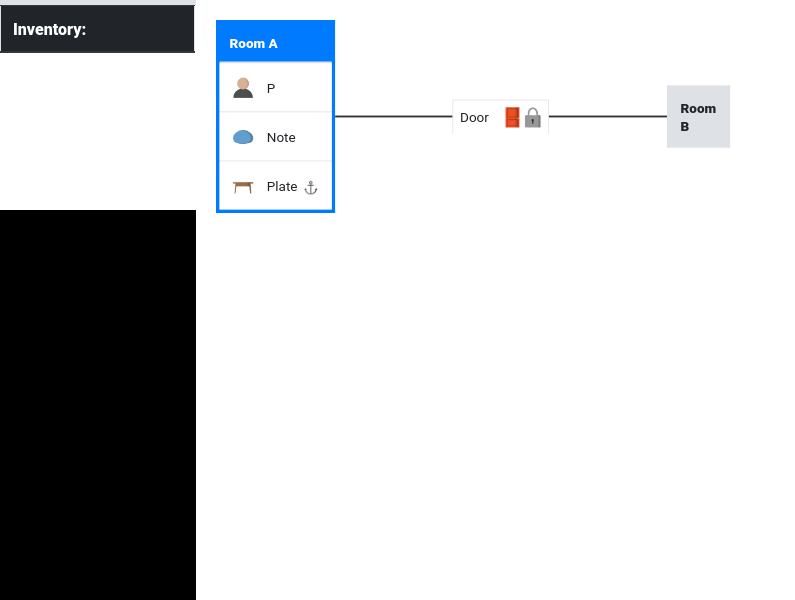

In [5]:
door = M.new_door(corridor, name="door")  # Door and room have their own "new" method, no need to provide the type.
M.add_fact("locked", door)  # Add a fact about the door, i.e. it is locked.
M.render()

##### Supported types of facts

 fact/predicate | description
----------------|------------
__match__(key, container/door) | The `key` matches the `container/door`'s lock.
__open__(container/door) | The `container/door` is open.
__closed__(container/door) | The `container/door` is closed.
__locked__(container/door) | The `container/door` is locked.
__edible__(food) | The `food` is edible, otherwise needs to be cooked first.

#### Create a key object that be used to unlock the door and place on the supporter object.

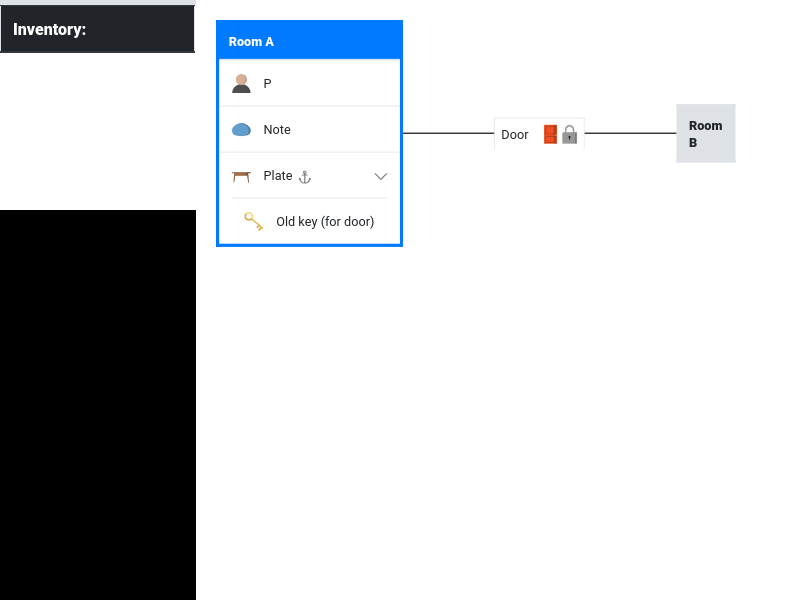

In [6]:
key = M.new(type="k", name="old key")  # Create a 'k' (i.e. key) object. 
M.add_fact("match", key, door)  # Tell the game 'old key' is matching the 'door''s lock
supporter.add(key)  # Add the 'old key' on the supporter.
M.render()

#### Create the object carried by the player and the container (initially closed).

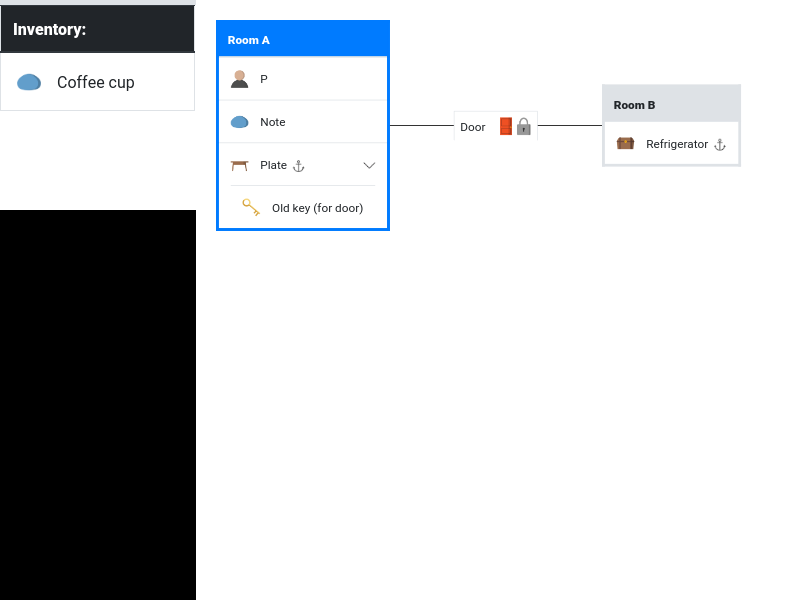

In [7]:
obj = M.new(type='o')  # New portable object with a randomly generated name.
M.inventory.add(obj)  # Add the object to the player's inventory.

container = M.new(type='c')  # Creating a container with a randomly generated name
M.add_fact("closed", container)  # Set the state of the container to 'closed'.
roomB.add(container)  # Place the container in Room B

M.render()

#### Finally, record the quest.
Type all commands you would like to include in the quest given for this game. To end recording, either input `quit` or interrupt the kernel (the stop button above).

In [8]:
quest = M.record_quest()




                    ________  ________  __    __  ________
                   |        \|        \|  \  |  \|        \
                    \$$$$$$$$| $$$$$$$$| $$  | $$ \$$$$$$$$
                      | $$   | $$__     \$$\/  $$   | $$
                      | $$   | $$  \     >$$  $$    | $$
                      | $$   | $$$$$    /  $$$$\    | $$
                      | $$   | $$_____ |  $$ \$$\   | $$
                      | $$   | $$     \| $$  | $$   | $$
                       \$$    \$$$$$$$$ \$$   \$$    \$$
              __       __   ______   _______   __        _______
             |  \  _  |  \ /      \ |       \ |  \      |       \
             | $$ / \ | $$|  $$$$$$\| $$$$$$$\| $$      | $$$$$$$\
             | $$/  $\| $$| $$  | $$| $$__| $$| $$      | $$  | $$
             | $$  $$$\ $$| $$  | $$| $$    $$| $$      | $$  | $$
             | $$ $$\$$\$$| $$  | $$| $$$$$$$\| $$      | $$  | $$
             | $$$$  \$$$$| $$__/ $$| $$  | $$| $$_____ | $$__/ $$
          

In [10]:
print(" > ".join(quest.commands))
print("\n" + quest.desc)

take old key from plate > unlock door with old key > open door > go east > open refrigerator > insert coffee cup into refrigerator > insert coffee cup into refrigerator > insert coffee cup into refrigerator

Hey, thanks for coming over to the TextWorld today, there is something I need you to do for me. Your first objective is to recover the old key from the plate within the Room A. Then, insert the old key into the door in the Room A's lock to unlock it. And then, ensure that the door is open. And then, make an effort to move east. Then, open the refrigerator inside the Room B. And then, you can put the coffee cup inside the refrigerator. Insert the coffee cup inside the refrigerator. Put the coffee cup inside the refrigerator in the Room B. Alright, thanks!


### Trying out the game
At any point, we can easily test the game we are currently building (if it can compile).

In [11]:
# Test the game by issuing commands from the generated walkthrough.
# You can set `walkthrough=False` if you want to play the game yourself. 
M.test(walkthrough=True)




                    ________  ________  __    __  ________
                   |        \|        \|  \  |  \|        \
                    \$$$$$$$$| $$$$$$$$| $$  | $$ \$$$$$$$$
                      | $$   | $$__     \$$\/  $$   | $$
                      | $$   | $$  \     >$$  $$    | $$
                      | $$   | $$$$$    /  $$$$\    | $$
                      | $$   | $$_____ |  $$ \$$\   | $$
                      | $$   | $$     \| $$  | $$   | $$
                       \$$    \$$$$$$$$ \$$   \$$    \$$
              __       __   ______   _______   __        _______
             |  \  _  |  \ /      \ |       \ |  \      |       \
             | $$ / \ | $$|  $$$$$$\| $$$$$$$\| $$      | $$$$$$$\
             | $$/  $\| $$| $$  | $$| $$__| $$| $$      | $$  | $$
             | $$  $$$\ $$| $$  | $$| $$    $$| $$      | $$  | $$
             | $$ $$\$$\$$| $$  | $$| $$$$$$$\| $$      | $$  | $$
             | $$$$  \$$$$| $$__/ $$| $$  | $$| $$_____ | $$__/ $$
          

### Randomly generate quests for your game

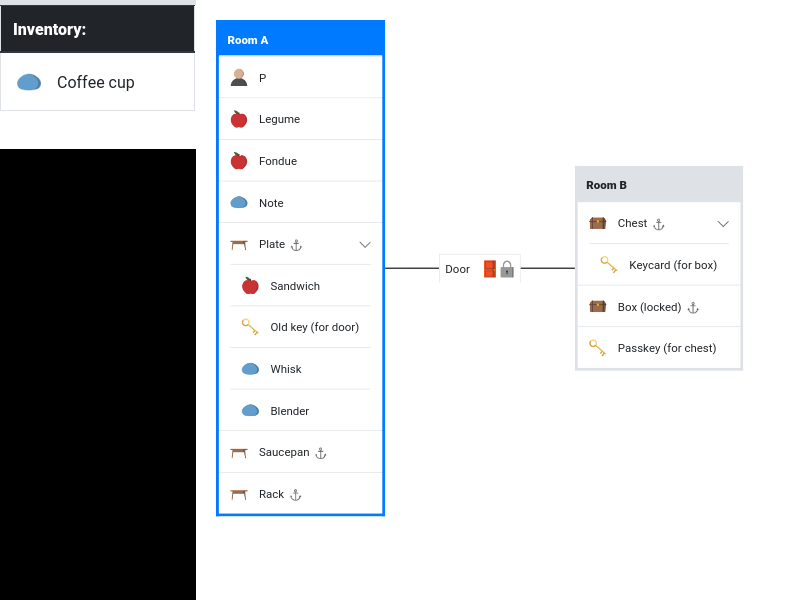

In [12]:
import copy
M2 = copy.deepcopy(M)  # Work on a copy.
M2.generate_distractors(10)  # Add 10 objects for the agent to interact with.
M2.render()

In [14]:
M2.generate_random_quests(5, length=2)  # Generate 5 random quests of length 2.
game = M2.build()
print(game.objective)

I hope you're ready to go into rooms and interact with objects, because you've just entered TextWorld! Here is how to play! First thing I need you to do is to lift the note from the floor of the Room A. And then, place the note on the platter. And then, retrieve the nest of puppies from the plate. With the nest of puppies, drop the nest of puppies on the floor of the Room A. After dropping the nest of puppies, retrieve the knife from the plate within the Room A. After stealing the knife, put the knife on the chair in the Room A. And then, pick-up the legume from the floor of the Room A. And then, put the legume on the plate within the Room A. After you have put the legume on the plate, retrieve the onion from the plate. Then, ditch the onion on the floor of the Room A. That's it!


In [15]:
# Test the game by issuing commands from the walkthrough.
M2.test(walkthrough=True)




                    ________  ________  __    __  ________
                   |        \|        \|  \  |  \|        \
                    \$$$$$$$$| $$$$$$$$| $$  | $$ \$$$$$$$$
                      | $$   | $$__     \$$\/  $$   | $$
                      | $$   | $$  \     >$$  $$    | $$
                      | $$   | $$$$$    /  $$$$\    | $$
                      | $$   | $$_____ |  $$ \$$\   | $$
                      | $$   | $$     \| $$  | $$   | $$
                       \$$    \$$$$$$$$ \$$   \$$    \$$
              __       __   ______   _______   __        _______
             |  \  _  |  \ /      \ |       \ |  \      |       \
             | $$ / \ | $$|  $$$$$$\| $$$$$$$\| $$      | $$$$$$$\
             | $$/  $\| $$| $$  | $$| $$__| $$| $$      | $$  | $$
             | $$  $$$\ $$| $$  | $$| $$    $$| $$      | $$  | $$
             | $$ $$\$$\$$| $$  | $$| $$$$$$$\| $$      | $$  | $$
             | $$$$  \$$$$| $$__/ $$| $$  | $$| $$_____ | $$__/ $$
          

## Handcrafting your game

In [ ]:
import textworld
from textworld import GameMaker

# Make the generation process reproducible.
from textworld import g_rng  # Global random generator.
g_rng.set_seed(20180329)

# GameMaker object for handcrafting text-based games.
M = GameMaker()

# ... build your game here.

# Uncomment the following lines to record a quest.
# quest = M.record_quest()
# print(" > ".join(quest.commands))
# print("\n" + quest.desc)
M.test()

## Common Errors
- `FailedConstraintsError`: One the constraints has failed. You need to resolve the issue before being able to compile the game. The most common issues:
    - Two objects cannot have the exact same name. Names can be composed of multiple words.
    - A same objects was added twice to a container, supporter, room or inventory.
- `ValueError: Could not determine status '' of container/door ...`: You have to provide the status (a fact) of the door/container, i.e. 'open', 'closed' or 'locked'.